# Computational Physics Projects

Here are a variety of physics problems, solved using various programming techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import random
import ipywidgets as widgets
from IPython import display
import scipy.integrate as integrate
import scipy.linalg as linalg
import scipy.optimize as optimize
import scipy.fftpack as fftpack

# (Project 1) Plotting Electric Potential

The electric potential $V$ of a point charge $q$ as measured at a radial distance $r$ away from it is given by
$$V=k\frac{q}{r}\,,$$
where $V$ has units of volts and $k=8.99\times10^{9}$ V$\cdot$m$\cdot$C$^{-1}$ is the electrostatic constant. (For the rest of this assignment, treat all values as being in units of meters, coulombs, or volts, as appropriate.)


First, I define my potential function:

In [2]:
def potential1D(r, q):
    k = 8.99e9
    V=k*(q/r)
    return V

Then, I use my function to make a 1-D plot of $V(r)$ for $0\le r\le 10$ and $q=-1\times10^{-9}$.

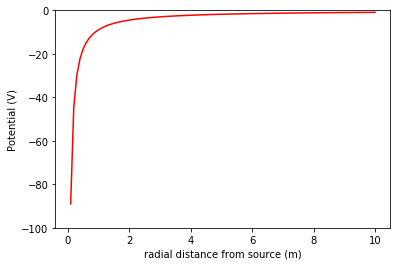

In [3]:
np.seterr(all="ignore")
r = np.linspace(0, 10, 100)
q = -1e-9
V = potential1D(r, q)
plt.plot(r, V, "r")
plt.ylim(-100, 0)
plt.xlabel("radial distance from source (m)")
plt.ylabel("Potential (V)")
plt.show()

Now, for a point charge $q$ at $(x_0, y_0)$ in 2-D space, the electric potential at all other locations in the $xy$-plane is:
$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,.$$
So, I now define a function `potential2D` which returns $V(x,y)$, given point charge $q$ at $(x_0, y_0)$.

In [4]:
def potential2D(x, y, q, x0, y0):
    k = 8.99e9
    V = k*(q/np.sqrt((x-x0)**2 + (y-y0)**2))
    return V

To visualize this 2-D potential function, I plot a 101x101 array of values for potential V, for $0\le x\le1$ and $0\le y\le1$, $q=1\times10^{-9}$, and $(x_0, y_0) = (0.5, 0.5)$.

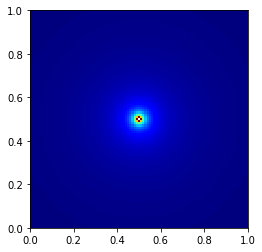

In [5]:
x_values = np.linspace(0, 1, 101)
y_values = np.linspace(0, 1, 101)
q = 1e-9
x0 = 0.5
y0 = 0.5
x, y = np.meshgrid(x_values, y_values)

V = potential2D(x, y, q, x0, y0)

plt.imshow(V, origin="lower", cmap="jet", extent=(0, 1, 0, 1))
plt.show()

However, as you can see, the large negative potential values overwhelm the other values we have calculate, leading to a mostly blue plot. To display more information, I limit the potential values to the range $-100\le V\le100$. Further, I add countors for the potential every 10 volts.

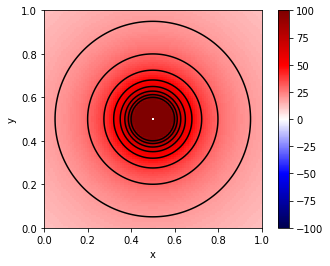

In [6]:
plt.imshow(V, origin="lower", cmap="seismic", vmin = -100, vmax= 100, extent=(0, 1, 0, 1))
plt.colorbar()
plt.contour(V, levels=np.arange(-100, 100, 10), colors ="black", extent=(0, 1, 0, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

If there is more than one point charge, by the superposition principle, the electric potential is given by the sum of the potential for each point charge. To model a simple case, I create a function named `V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)` that takes 3 point charges&mdash;$q_1$ at $(x_1, y_1)$, etc.&mdash;and creates a 2-D plot formatted exactly like in the previous part.

In [7]:
def V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3):
    k = 8.99e-9
    V1 = potential2D(x, y, q1, x1, y1)
    V2 = potential2D(x, y, q2, x2, y2)
    V3 = potential2D(x, y, q3, x3, y3)
    Vt = V1 + V2 + V3
    x_values = [x1, x2, x3]
    y_values = [y1, y2, y3]
    plt.plot(x1, y1, marker=".", markersize=10, color="white")
    plt.plot(x2, y2, marker=".", markersize=10, color="white")
    plt.plot(x3, y3, marker=".", markersize=10, color="white")
    plt.imshow(Vt, origin="lower", cmap="seismic", vmin=-100, vmax=100, extent=(0, 1, 0, 1))
    plt.colorbar()
    plt.contour(Vt, levels=np.arange(-100, 100, 10), colors ="black", extent=(0, 1, 0, 1))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

Finally, in the plot below, I randomly generate 3 point charges and their positions by sampling from uniform distributions.

V_plot(-1.18e-10, 0.16, 0.45,
        2.24e-10, 0.87, 0.57,
       -1.38e-09, 0.23, 0.09)


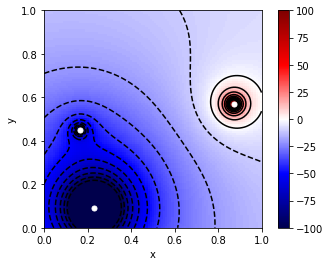

In [8]:
q1 = random.uniform(-2e-9, 2e-9)
q2 = random.uniform(-2e-9, 2e-9)
q3 = random.uniform(-2e-9, 2e-9)
x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
x3 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)
y3 = random.uniform(0, 1)

# print values for verification
print(f"V_plot({q1:9.2e}, {x1:4.2f}, {y1:4.2f},")
print(f"       {q2:9.2e}, {x2:4.2f}, {y2:4.2f},")
print(f"       {q3:9.2e}, {x3:4.2f}, {y3:4.2f})")
V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)

# (Project 2) Calculating Electron Energy Levels

The energy levels of a single electron atom can be approximated using the formula
$$E_n=-(13.6\ \mbox{eV})\,\frac{Z^2}{n^2}\,,$$
where $Z$ is the atomic number, and $n$ is the principle quantum number (e.g. $n=1$ is the ground state). I wrote the following function than returns the energy of an electron in eV.

In [9]:
def energy(Z, n):
    E = (-13.6) * (Z**2/n**2)
    return E

However, the atomic numer $Z$ and principle quantum number $n$ must be positive integers. So, I modified my code to raise an `AssertionError` if `Z` and `n` do not satisfy this condition.

In [10]:
def energy(Z, n):
    assert Z > 0 and n > 0 and type(Z) == int and type(n) == int, "Not possitive integers"
    E = (-13.6) * (Z**2/n**2)
    return E

Next, I wrote a function named `levels(Zmin, Zmax, nmin, nmax)` that calls `energy(Z, n)` repeatedly for a range of values for `Z` and `n`, and prints a table containing the energies.

In [11]:
def levels(Zmin, Zmax, nmin, nmax):
    for i in range(Zmin, Zmax + 1):
        for j in range(nmin, nmax + 1):
            print(energy(i, j), " ", end=" ")
        print("\n")

Of course, it is useful to create formatted output in science to present to audiences, so I refined the levels function to accommodate this. Levels now reads from a text file which I shall provide called `energy_levels.txt`.

In [12]:
def levels(Zmin, Zmax, nmin, nmax):
    file = open("energy_levels.txt", "w")
    for i in range(Zmin-1, Zmax+1):
        width = 0
        if Zmax - Zmin < 50:
            width = 10
        else:
            width = 11
        if i == Zmin - 1:
            string = "{:>{r}}"
            perZ = ("Z", )
            for j in range(nmin, nmax+1):
                s = "n = " + str(j)
                perZ = perZ + (s, )
                string = string + "{:>{r}}"
            print(string.format(*perZ, r = width))
            file.write(string.format(*perZ, r = 11))
            file.write("\n")
                
        else:
            
            string = "{:>{r}}"
            perZ = (i, )
            for j in range(nmin, nmax+1):
                s = energy(i, j)
                perZ = perZ + (s,)
                string = string + "{:>{r}.2f}"
            print(string.format(*perZ, r = width))
            file.write(string.format(*perZ, r = 11))
            file.write("\n")
    file.close()


levels(1, 10, 1, 5) # Example

         Z     n = 1     n = 2     n = 3     n = 4     n = 5
         1    -13.60     -3.40     -1.51     -0.85     -0.54
         2    -54.40    -13.60     -6.04     -3.40     -2.18
         3   -122.40    -30.60    -13.60     -7.65     -4.90
         4   -217.60    -54.40    -24.18    -13.60     -8.70
         5   -340.00    -85.00    -37.78    -21.25    -13.60
         6   -489.60   -122.40    -54.40    -30.60    -19.58
         7   -666.40   -166.60    -74.04    -41.65    -26.66
         8   -870.40   -217.60    -96.71    -54.40    -34.82
         9  -1101.60   -275.40   -122.40    -68.85    -44.06
        10  -1360.00   -340.00   -151.11    -85.00    -54.40


The levels function can also work with random inputs for the minimun and maximum Z and n values.

In [13]:
from random import randint
Zmin = randint(2, 5)
Zmax = randint(11, 13)
nmin = randint(2, 4)
nmax = randint(6, 7)
levels(Zmin, Zmax, nmin, nmax)

         Z     n = 2     n = 3     n = 4     n = 5     n = 6     n = 7
         2    -13.60     -6.04     -3.40     -2.18     -1.51     -1.11
         3    -30.60    -13.60     -7.65     -4.90     -3.40     -2.50
         4    -54.40    -24.18    -13.60     -8.70     -6.04     -4.44
         5    -85.00    -37.78    -21.25    -13.60     -9.44     -6.94
         6   -122.40    -54.40    -30.60    -19.58    -13.60     -9.99
         7   -166.60    -74.04    -41.65    -26.66    -18.51    -13.60
         8   -217.60    -96.71    -54.40    -34.82    -24.18    -17.76
         9   -275.40   -122.40    -68.85    -44.06    -30.60    -22.48
        10   -340.00   -151.11    -85.00    -54.40    -37.78    -27.76
        11   -411.40   -182.84   -102.85    -65.82    -45.71    -33.58
        12   -489.60   -217.60   -122.40    -78.34    -54.40    -39.97
        13   -574.60   -255.38   -143.65    -91.94    -63.84    -46.91


# (Project 3) Waves in 2-D

The equation
$$z(x,y) = z_0\sin\Big(k\sqrt{x^2+y^2}-\omega t\Big)$$
describes a circular set of waves centered on the origin that propagate outwards as time progresses. In this project, I wrote code to animate the propogation of a wave in two dimensional space.
First, I wrote the function below, named `wave(t, z0, k, w)`, that returns $z$ (as a 2-D array).

In [14]:
def wave(t, z0, k, w):
    x_values = np.linspace(-20, 20, 100)
    y_values = np.linspace(-20, 20, 100)
    x, y = np.meshgrid(x_values, y_values)
    
    z = z0*np.sin(k*np.sqrt(x**2 + y**2) -w*t)
    return z

Here is a plot of the wave at time $t = 0$, with inputs `z0 = k = w = 1`

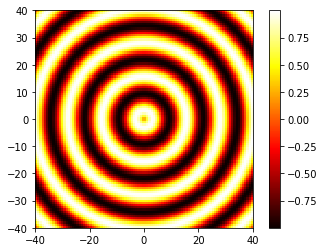

In [15]:
plt.imshow(wave(0, 1, 1, 1), origin="center", cmap="hot", extent=(-40, 40, -40, 40))
plt.colorbar()
plt.show()

To increase the functionality of this code, I add sliders. This allows the user to change the amplitude, wave number, and frequency of the resulting wave

In [16]:
def plot(z0, k, w):
    fig = plt.figure()
    z = wave(0, z0, k, w)
    plt.imshow(z, origin="lower", extent=(-20, 20, -20, 20), vmin=0, vmax= 5, cmap="hot")
    plt.colorbar()
    plt.show()
    
sliderz0 = widgets.FloatSlider(min=0, max=5)
sliderk = widgets.IntSlider(min = 1, max = 5, step=1)
sliderw = widgets.FloatSlider(min = 0, max = 5)

gui = widgets.interactive(plot, z0=sliderz0, k = sliderk, w=sliderw, continuous_update=False)

In [17]:
display.display(gui)

interactive(children=(FloatSlider(value=0.0, description='z0', max=5.0), IntSlider(value=1, description='k', m…

## Animation

Finally, I animate the wave, with $w = 10$ s$^{-1}$. The animation runs in real-time.

In [18]:
fig = plt.figure()
graph = plt.imshow(wave(0, 1, 1, 10), origin="lower", extent=(-20, 20, -20, 20), cmap="hot")
plt.axis("scaled")

def animate(frame):
    graph.set_data(wave(frame/50, 1, 1, 10))
    
anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## (Project 4) Electric Field of a Charge Distribution

If given a certain charge distribution, a physicist wants to know what forces charged particles will experience in different regions around that distribution. In some instances, it is easy enough to calculate the electric field $\vec{E}$ to find the force. However, in most cases, this is too difficult. Instead we can calculate the electric potential $$V=k\int\frac{dq}{r}\,,$$
and then find the electric field, $\vec{E}=-\nabla V$. To simplify the presentaion, I'll work in a 2-D plane. For that case, the electric potential will be given by the following double-integral:
$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,,$$
where the 2-D charge distribution $\sigma$ is entirely contained with the region $-L<x<L$ and $-L<y<L$. I create an array for potential, evaluating this double integral at each point in space.
Since I need high spatial resolution, I create my own integrator, called `simps2D(f, L)`, which takes a function `f` and returns the integral using Simpson's rule, on the interval $-L<x<L$ and $-L<y<L$ on a $200\times200$ grid. Since this uses arrays instead of calling multiple functions, we have a faster run-time compared to pre-built integrators, like `scipy.dblquad`.

In [19]:
def simps2D(f, L):
    f_array = np.empty((200,200))
    x_values= np.linspace(-L, L, 200)
    y_values= np.linspace(-L, L, 200)
    x, y = np.meshgrid(x_values, y_values)
    integrand = f(x, y)
    I1 = integrate.simps(integrand, x)
    I2 = integrate.simps(I1, y_values)
    return I2

## Calculating Potential

Now, I write a function, `potential(sigma, x, y)` that accepts a two dimensional charge distribution and returns the electric potential at the point (x,y) as $$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,.$$
For this demonstration, I use $L = 10$.

To test the code, I'll use the charge distribution $$\sigma(x,y) = \sin\left(\frac{\pi\,x}{2}\right)\sin\left(\frac{\pi\,y}{2}\right)\,.$$
I define the function for this distribution below.

In [20]:
def potential(sigma, x, y):
    L = 10
    def func(x_prime, y_prime):
        return sigma(x_prime, y_prime)/np.sqrt((x-x_prime)**2 + (y-y_prime)**2)
    
    value = simps2D(func, L)
    return value

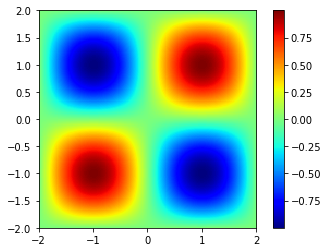

In [21]:
def sigma(x, y):
    return np.sin(np.pi*x/2)*np.sin(np.pi*y/2)

x_values = np.linspace(-2, 2, 200)
y_values = np.linspace(-2, 2, 200)
x, y = np.meshgrid(x_values, y_values)
sines = sigma(x, y)
plt.imshow(sines, origin="lower", cmap="jet", extent=(-2, 2, -2, 2))
plt.colorbar()
plt.show()

x_values = np.arange(-2, 2, 0.1)
y_values = np.arange(-2, 2, 0.1)


V = np.empty((41, 41))
for i, xx in enumerate(x_values):
    for j, yy in enumerate(y_values):
        V[i, j] = potential(sigma, xx, yy)


Now, I plot equipotential lines.

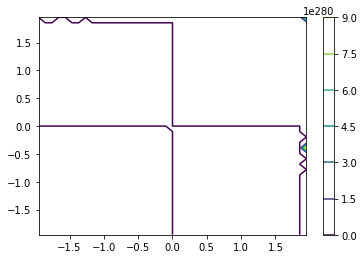

In [22]:
plt.contour(V, origin="lower", extent=(-2, 2, -2, 2))
plt.colorbar()
plt.show()

Finally, I calculate $\vec{E}=-\nabla V$ to find the electric field. I make a quiver plot of $\vec{E}$, put it on top of a contour plot of $V$ and use `imshow` to plot the charge distribution, $\sigma$.

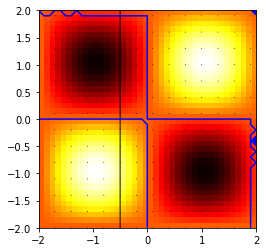

In [23]:
x, y = np.meshgrid(x_values, y_values)
dzdy, dzdx = np.gradient(V)
dzdx = -dzdx # since it's the negative gradient
dzdy = -dzdy
sines = sigma(x, y)
plt.quiver(x[::3, ::3], y[::3, ::3], dzdx[::3, ::3], dzdy[::3, ::3], pivot="middle")
plt.contour(V, colors="blue", extent=(-2, 2, -2, 2))
plt.imshow(sines, origin="lower", cmap="hot", extent=(-2, 2, -2, 2))

plt.show()

# (Project 5) Eigenfrequencies and Springs

In this project, I animate the horizontal vibrations of the chain at each of its eigenfrequencies.

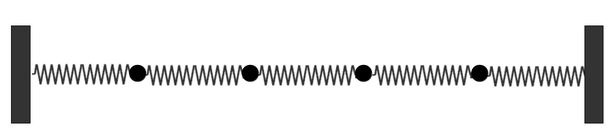

Let $x_0$, $x_1$, $x_2$, and $x_3$ be the horizontal displacement of each mass from equilibrium, numbered from left to right. (For example, in the figure above, $x_0 = x_1 = x_2 = x_3 = 0$. The potential energy of the chain is
$$U = \tfrac12 k x_0^2 + \tfrac12 k(x_1-x_0)^2 + \tfrac12 k(x_2-x_1)^2 + \tfrac12 k(x_3-x_2)^2 + \tfrac12 k x_3^2\,,$$
where I have one term for each of the five springs.

Using
$$F_i=-\frac{\partial U}{\partial x_i} = m\ddot{x_i}\,,$$
the four equations of motion for the masses are: $$m\ddot{x_0} = -k(2x_1-x_1)\,$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$$m\ddot{x_1} = -k(x_0+x_1-x_2)\,,$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$$m\ddot{x_2} = -k(-x_1+2x_2-x_3)\,,$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$$m\ddot{x_2} = -k(-x_2+2x_3)\,,$$

To find the eigenfrequencies $\omega$ of the system, I exploit the fact that the solution to a simple harmonic oscillator takes the form $\ddot{x_i} = -\omega^2 x_i$.
I can put the equations I wrote above into the form
$$\mathbf{Mx}=-\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$
where $\mathbf{M}$ is a matrix with the coefficients from the equation of motion and $\omega_0=\sqrt{k/m}$ is the natural frequency of each spring. I'll choose units where $\omega_0 = 1$. Now, this is an eigenvalue problem.
$$\mathbf{Mx}=-\omega^2\mathbf{x}\,$$
where $\omega$ are the angular *eigenfrequencies*.

In [24]:
M = np.array([[2., -1., 0., 0.],
              [-1., 2., -1., 0.],
              [0., -1., 2., -1.],
              [0., 0., -1., 2.]])

Here, I calculate the eignenvalues and eigenfrequencies of this system.

In [25]:
eigenval, eigenvec = linalg.eigh(M)

eigfreq1 = np.sqrt(eigenval[0])
eigfreq2 = np.sqrt(eigenval[1])
eigfreq3 = np.sqrt(eigenval[2])
eigfreq4 = np.sqrt(eigenval[3])


eigvec1 = eigenvec[3]
eigvec2 = -1*eigenvec[2]
eigvec3 = eigenvec[1]
eigvec4 = eigenvec[0]

Now for the animation we've all been waiting for!

The time-dependent solution to a simple harmonic oscillator is
$$x_i(t) = A_i\sin(\omega t + \phi)\,,$$
where $A_i$ is the amplitude and $\phi$ is the phase. In other words, when the chain is driven at an arbitrary frequency $\omega$, all four masses move with that same frequency, but different amplitudes and phases. In general, the values of these amplitudes and phases are not obvious.

However, if the system is driven at an eigenfrequency, the resulting amplitudes of the four masses are exactly the elements of the associated eigenvector (or more precisely, are proportional to the elements of the eigenvector, since they've been normalized). The phase is either zero (if the element is positive) or $\pi$ (if the element is negative). However, it's easiest to just set $\phi=0$ and instead let the amplitude be positive or negative.

## Spring Animation

First, here's the code to draw the spring:

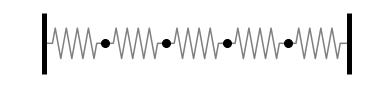

In [26]:
def draw_spring(xi, xf):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
    """
    dy = 0.5
    x = np.linspace(xi, xf, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3)
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else
    return spring

def draw_chain(x_offsets):
    """
    Draw a chain of five springs and four masses.
            x_offsets = Sequence of displacements from equilibrium position.
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # draw springs
    spring1 = draw_spring(0, x[0])
    spring2 = draw_spring(x[0], x[1])
    spring3 = draw_spring(x[1], x[2])
    spring4 = draw_spring(x[2], x[3])
    spring5 = draw_spring(x[3], 10)
    springs = np.array([spring1, spring2, spring3, spring4, spring5])
    # draw masses
    mass = plt.plot(x, [0, 0, 0, 0], "ko", ms=8)

    # draw verycial edges
    plt.vlines([0, 10], -1, 1, "k", lw=5)
    return mass, springs
# example of an unstretched chain
draw_chain([0, 0, 0, 0])
plt.axis("scaled")
plt.axis("off")
plt.show()

In [27]:
fig = plt.figure(figsize=(14,6))

x = np.arange(2, 10, 2)
def animate(frame):
    fig.clear()
    plt.subplot(2, 2, 1)
    x1 = eigvec1[0]*np.sin(eigfreq1*frame)
    x2 = eigvec1[1]*np.sin(eigfreq1*frame)
    x3 = eigvec1[2]*np.sin(eigfreq1*frame)
    x4 = eigvec1[3]*np.sin(eigfreq1*frame)
    offsets = [x1, x2, x3, x4]
    draw_chain(offsets)
    plt.subplot(2,2,2)
    x1 = eigvec2[0]*np.sin(eigfreq2*frame)
    x2 = eigvec2[1]*np.sin(eigfreq2*frame)
    x3 = eigvec2[2]*np.sin(eigfreq2*frame)
    x4 = eigvec2[3]*np.sin(eigfreq2*frame)
    offsets = [x1, x2, x3, x4]
    draw_chain(offsets)
    plt.subplot(2,2,3)
    x1 = eigvec3[0]*np.sin(eigfreq3*frame)
    x2 = eigvec3[1]*np.sin(eigfreq3*frame)
    x3 = eigvec3[2]*np.sin(eigfreq3*frame)
    x4 = eigvec3[3]*np.sin(eigfreq3*frame)
    offsets = [x1, x2, x3, x4]
    draw_chain(offsets)
    plt.subplot(2,2,4)
    x1 = eigvec4[0]*np.sin(eigfreq4*frame)
    x2 = eigvec4[1]*np.sin(eigfreq4*frame)
    x3 = eigvec4[2]*np.sin(eigfreq4*frame)
    x4 = eigvec4[3]*np.sin(eigfreq4*frame)
    offsets = [x1, x2, x3, x4]
    draw_chain(offsets)
    
anim = FuncAnimation(fig, animate, frames=100, interval=100)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

# (Project 6) Lagrange Points

The [Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point) are the five points located around a pair of celestial bodies where the net gravitational field is exactly zero as measured in a co-rotating reference frame (i.e. accounting for the non-inertial centrifugal force). Your task is to calculate the five Lagrange points for the Earth-Moon system.

In a reference frame that rotates about the earth-moon system's center of mass, the effective gravitational potential is
$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$
where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$, $M=5.974\times10^{24}$ kg is the mass of the earth, $m=7.348\times10^{22}$ kg is the mass of the moon, and $\omega=2.662\times10^{-6}$ s$^{-1}$ is the orbital angular frequency of the moon about the earth-moon system's center of mass. Note that the third term above is the *centrifugal force* introduced by working in co-rotating coordinates. The three distances $r_E$, $r_m$, and $r$ are measured from the earth, moon, and center of mass, respectively.

I make a plot with the center of mass at the origin, and with the earth and moon lying along the $x$-axis

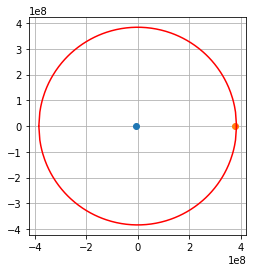

In [28]:
R = 3.844e8
M = 5.974e24
m = 7.348e22
xE = -m*R/(M+m)
xm = xE + R
plt.plot(xE, 0, "o") # the earth
plt.plot(xm, 0, "o") # the moon
plt.xlim(-1.2*R, 1.2*R)
plt.ylim(-1.2*R, 1.2*R)
the_input = np.linspace(-R, R, 200)
f_top = np.sqrt(R**2 - the_input**2)
f_bottom = -1*np.sqrt(R**2 - the_input**2)
plt.grid()
plt.plot(the_input, f_top, "r")
plt.plot(the_input, f_bottom, "r")
plt.axis("scaled")
plt.show()

Next, I create a function named `potential(x, y)` that returns $V(x,y)$. Note: in this function,
$$r = \sqrt{x^2 + y^2}\,,$$
$$r_E = \sqrt{(x-x_E)^2 + (y-y_E)^2}\,,$$
and
$$r_m = \sqrt{(x-x_m)^2 + (y-y_m)^2}\,$$
where $(x_E, y_E)$ and $(x_m, y_m)$ are the locations of the earth and moon as plotted in the previous part.

In [29]:
def potential(x, y):
    G = 6.674e-11 # m^3 kg^-1 s^-2
    R = 3.844e8 # m
    M = 5.974e24 # kg
    m = 7.348e22 # kg
    w = 2.662e-6 # s^-1
    xE = -m*R/(M+m)
    xm = xE + R
    r = np.sqrt(x**2 + y**2)
    rE = np.sqrt((x-xE)**2 + y**2)
    rm = np.sqrt((x-xm)**2 + y**2)
    V = (-G*M/rE)-(G*m/rm)-(1/2)*(r**2)*(w**2)
    return V

To showcase this function, I make a contour plot of the gravitational potential, $V$, on top of the earth-moon system I previously plotted.

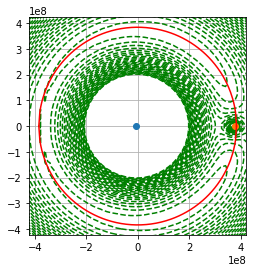

In [30]:
R = 3.844e8
M = 5.974e24
m = 7.348e22
xE = -m*R/(M+m)
xm = xE + R

plt.xlim(-1.2*R, 1.2*R)
plt.ylim(-1.2*R, 1.2*R)

plt.plot(xE, 0, "o") # the earth
plt.plot(xm, 0, "o") # the moon

the_input = np.linspace(-R, R, 200)
f_top = np.sqrt(R**2 - the_input**2)
f_bottom = -1*np.sqrt(R**2 - the_input**2)
plt.grid()
plt.plot(the_input, f_top, "r")
plt.plot(the_input, f_bottom, "r")
plt.axis("scaled")

x_values = np.linspace(-1.2*R, 1.2*R, 50)
y_values = np.linspace(-1.2*R, 1.2*R, 50)
x, y = np.meshgrid(x_values, y_values)
V = potential(x, y)
plt.contour(V, colors="green", levels=np.arange(-2100000, -1500000, 0.2e5), 
            origin="lower", extent=(-1.2*R,1.2*R, -1.2*R, 1.2*R))
plt.show()

The gravitation field is given by
$$\vec{F}=-\vec{\nabla}V\,.$$
    The Lagrange points are located at five places where the magnitude of $F$ is zero. I calculate the **magnitude** of the gradient by hand and write a function for it. Then, I use this function and a routine from `scipy.optimize` to locate the five Lagrange points and store them in arrays, `L1`, `L2`, `L3`, `L4`, and `L5`.

In [31]:
def magGravField(xy):
    x, y = xy
    G = 6.674e-11 # m^3 kg^-1 s^-2
    R = 3.844e8 # m
    M = 5.974e24 # kg
    m = 7.348e22 # kg
    w = 2.662e-6 # s^-1
    xE = -m*R/(M+m)
    xm = xE + R
    xterm = G*M*(x-xE)/((x-xE)**2+y**2)**(3/2) + G*m*(x-xm)/((x-xm)**2+y**2)**(3/2) - x*w**2
    yterm = G*M*y/((x-xE)**2+y**2)**(3/2) + G*m*y/((x-xm)**2+y**2)**(3/2) - y*w**2
    return np.sqrt(xterm**2 + yterm**2)

guess1 = (2.5e8, 0)
L1 = optimize.minimize(magGravField, guess1, method="Nelder-Mead")
guess5 = (2.0e8, -2.5e8)
L5 = optimize.minimize(magGravField, guess5, method="Nelder-Mead")
guess4 = (2.0e8, 3.5e8)
L4 = optimize.minimize(magGravField, guess4, method="Nelder-Mead")
guess3= (-2.5e8, 0)
L3 = optimize.minimize(magGravField, guess3, method="Nelder-Mead")
guess2 = (4.0e8, 0)
L2 = optimize.minimize(magGravField, guess2, method="Nelder-Mead")

L1 = L1.x
L2 = L2.x
L3 = L3.x
L4 = L4.x
L5 = L5.x

Finally, I add the Lagrange points to my plot.

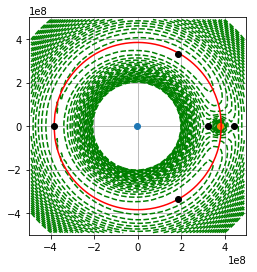

In [32]:
R = 3.844e8
M = 5.974e24
m = 7.348e22
xE = -m*R/(M+m)
xm = xE + R
bound = 1.3*R

plt.plot(xE, 0, "o") # the earth
plt.plot(xm, 0, "o") # the moon

the_input = np.linspace(-R, R, 200)
f_top = np.sqrt(R**2 - the_input**2)
f_bottom = -1*np.sqrt(R**2 - the_input**2)
plt.grid()
plt.plot(the_input, f_top, "r")
plt.plot(the_input, f_bottom, "r")
plt.axis("scaled")

x_values = np.linspace(-bound, bound, 50)
y_values = np.linspace(-bound, bound, 50)
x, y = np.meshgrid(x_values, y_values)
V = potential(x, y)
plt.contour(V, colors="green", levels=np.arange(-2100000, -1500000, 0.2e5), 
            origin="lower", extent=(-bound, bound, -bound, bound))
plt.plot(L1[0], L1[1], "ko")
plt.plot(L2[0], L2[1], "ko")
plt.plot(L3[0], L3[1], "ko")
plt.plot(L4[0], L4[1], "ko")
plt.plot(L5[0], L5[1], "ko")

plt.xlim(-bound, bound)
plt.ylim(-bound, bound)
plt.show()


In [33]:
def _download(filename):
    """
    Download data file from the Internet and save it in the working directory
    """
    import os
    import urllib.request as url
    if not os.path.isfile(filename):
        url.urlretrieve(f"http://www.pitt.edu/~djn23/phys1321/{filename}", filename)

# (Project 7) Fourier Transform of Sound

Fourier Analysis can be used to analyze many different systems. For this project, let's perform Fourier Transforms on music to find the various notes being played in the audio track.

I read in a text file named `trumpet.txt` which contains the waveform of a trumpet playing the note C_5 (with a frequency of 523.251 Hz).

In [34]:
_download("trumpet.txt")

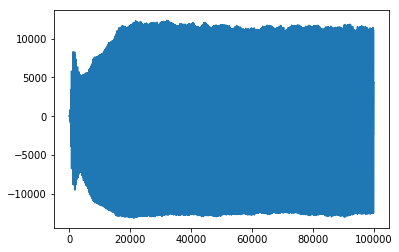

In [35]:
trumpet = np.loadtxt("trumpet.txt", unpack=True)
x = np.linspace(0, 100000, 100000)
plt.plot(x, trumpet)
plt.show()

display.Audio(trumpet, rate=44100) # sampling rate of 44,100 samples per second

Here, I calculate the Fourier transform of the trumpet's waveform, and plot the **power spectrum** of the Fourier coefficients ($|c_k|^2$) for frequencies between zero and 4000 Hz. The peaks observed on the plot are the **harmonics**.)

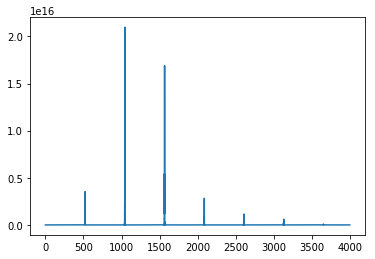

In [36]:
harmonic = 523.251 # Hz
tepmurt = fftpack.fft(trumpet)
powerSpec = (abs(tepmurt))**2
dt = 1/44100 # seconds per sample
N = 100000
df = 1/(N*dt) # frequency resolution
limit = int(4000/df)
powerSpec_reduced = powerSpec[0:limit]
freq_trumpet = np.linspace(0, 4000, limit)
plt.plot(freq_trumpet, powerSpec_reduced)
multiples = np.array([harmonic, harmonic*2, harmonic*3])
plt.show()

To further present the power of the Fourier Transform, let's listen to the brilliant Star Wars opening theme!

In [37]:
from scipy.io.wavfile import read as wavread
rate, data = wavread("StarWars.wav")
display.Audio(data, rate=44100)

In this analysis, I'll consider the first chord played by the orchestra in the theme.

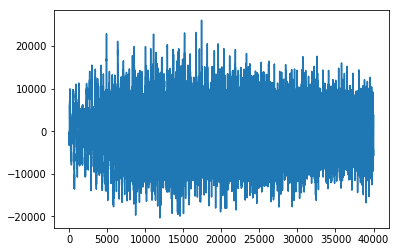

In [38]:
data_reduced = data[20000:60000]

x = np.linspace(0, 40000, 40000)
plt.plot(x, data_reduced)
plt.show()

display.Audio(data_reduced, rate=44100)

Like I did for the trumpet, I will plot the power spectrum of this audio track and identify what pitches are present in the mix. Fascinating stuff!

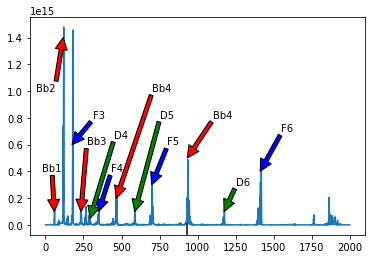

In [39]:
datak = fftpack.fft(data_reduced)
powerSpec_Vader = (abs(datak))**2
dt_new = 1/44100
N_new = 40000
df_new = 1/(N_new*dt_new) # frequency resolution
limit_new = int(2000/df_new)
powerSpec_Vader = powerSpec_Vader[0:limit_new]
freq_luke = np.linspace(0, 2000, limit_new)
plt.plot(freq_luke, powerSpec_Vader)
plt.axvline(x=932, color="black", ymin=0, ymax=0.05)

plt.annotate("Bb2", xy=(116.54, 1.4e15), xytext=(-60,1.0e15), arrowprops={"facecolor": "red"})
plt.annotate("Bb1", xy=(58.27, 0.1e15), xytext=(-20, 0.4e15), arrowprops={"facecolor": "red"})
plt.annotate("Bb3", xy=(233.08, 0.1e15), xytext=(270, 0.6e15), arrowprops={"facecolor": "red"})
plt.annotate("Bb4", xy=(466, 0.2e15), xytext=(700, 1e15), arrowprops={"facecolor": "red"})
plt.annotate("Bb4", xy=(932, 0.5e15), xytext=(1100, 0.8e15), arrowprops={"facecolor": "red"})
plt.annotate("F3", xy=(174.61, 0.6e15), xytext=(310, 0.8e15), arrowprops={"facecolor": "blue"})
plt.annotate("F4", xy=(349.23, 0.1e15), xytext=(430, 0.4e15), arrowprops={"facecolor": "blue"})
plt.annotate("F5", xy=(698.46, 0.3e15), xytext=(800, 0.6e15), arrowprops={"facecolor": "blue"})
plt.annotate("F6", xy=(1410.91, 0.4e15), xytext=(1550, 0.7e15), arrowprops={"facecolor": "blue"})
plt.annotate("D4", xy=(293.66, 0.05e15), xytext=(450, 0.65e15), arrowprops={"facecolor": "green"})
plt.annotate("D5", xy=(587, 0.1e15), xytext=(750, 0.8e15), arrowprops={"facecolor": "green"})
plt.annotate("D6", xy=(1174, 0.1e15), xytext=(1250, 0.3e15), arrowprops={"facecolor": "green"})
plt.show()

# (Project 8) Double Pendulum


In [40]:
def RK4(f, x, t, h):
    k1 = h*f(x,t)
    k2 = h*f(x+(k1/2), t+(h/2))
    k3 = h*f(x+(k2/2), t+(h/2))
    k4 = h*f(x+k3, t+h)
    return (x + (1/6)*(k1+2*k2+2*k3+k4))

A double pendulum consists of a normal pendulum with another pendulum hanging from its end. For simplicity let us ignore friction, and assume that both pendulums have bobs of the same mass $m$ and massless arms of the same length $\ell$. Thus the setup looks like this:

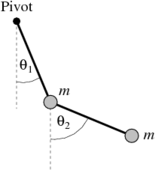

The position of the arms at any moment in time is uniquely specified by the two angles $\theta_1$ and $\theta_2$.  The equations of motion for the angles are most easily derived using the Lagrangian formalism. The resulting pair of equations are
$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$

These are second-order equations, but I can convert them into first-order ones by the usual method, defining two new variables, $\omega_1$ and $\omega_2$, thus:
$$\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2\,.$$
In terms of these variables our equations of motion become
$$\begin{align}
2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2) &+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2) &- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$
Finally I have to rearrange these into the standard form with a single derivative on the left-hand side of each one, which gives

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$


These two equations, along with the equations $\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$, give four first-order equations which between them define the motion of the double pendulum.

I write a program to solve the equations of motion from $t=0$ to $t=60$ seconds for the case where $\ell=40\,$cm, with the initial conditions $\theta_1=\theta_2=90^\circ$ and $\omega_1=\omega_2=0$. I then store the values of $\theta_1$, $\theta_2$, $\omega_1$, and $\omega_2$ in arrays named `th1`, `th2`, `w1`, and `w2`.

In [41]:
def f(r, t):
    g = 9.8 # m/s^2
    l = 40e-2 # m
    th1, w1, th2, w2 = r
    fth1 = w1
    fth2 = w2
    fw1 = -((np.sin(2*th1 - 2*th2)*w1**2)+(2*np.sin(th1-th2)*w2**2)+(g/l)*(np.sin(th1-2*th2)+3*np.sin(th1)))/(3-np.cos(2*th1-2*th2))
    fw2 = ((np.sin(th1-th2)*4*w1**2)+(np.sin(2*th1-2*th2)*w2**2)+(2*(g/l)*(np.sin(2*th1-th2)-np.sin(th2))))/(3-np.cos(2*th1-2*th2))
    return np.array([fth1, fw1, fth2, fw2])

th1, th2 = (np.pi)/2, (np.pi)/2
w1, w2 = 0,0
t = 0
tmax = 60
h = 0.001
delta = 1e-6
th1_values = []
th2_values = []
w1_values = []
w2_values =[]

t = np.arange(0, 60, h)
for t_prime in t:
    th1_values.append(th1)
    w1_values.append(w1)
    th2_values.append(th2)
    w2_values.append(w2)
    r = (th1, w1, th2, w2)
    th1, w1, th2, w2 = RK4(f, r, t_prime, h)
    
th1 = np.array(th1_values)
th2 = np.array(th2_values)
w1 = np.array(w1_values)
w2 = np.array(w2_values)

Now, I make a plot of $\theta_1(t)$ and $\theta_2(t)$.

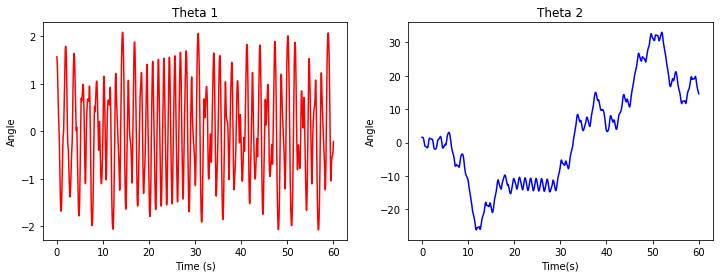

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, th1, color="red")
plt.title("Theta 1")
plt.xlabel("Time (s)")
plt.ylabel("Angle")
plt.subplot(1, 2, 2)
plt.plot(t, th2, color="blue")
plt.title("Theta 2")
plt.xlabel("Time(s)")
plt.ylabel("Angle")
plt.show()

The mechanical energy of the system is given by
$$E = m\ell^2 \bigl[ \omega_1^2 + \tfrac12 \omega_2^2 + \omega_1\omega_2 \cos(\theta_1-\theta_2) \bigr] - mg\ell(2\cos\theta_1 + \cos\theta_2)\,.$$

I calculated the total energy of the system assuming that the mass of the bobs is $1\,$kg each, and then I made a graph of energy as a function of time from $t=0$ to $t=100$ seconds. 

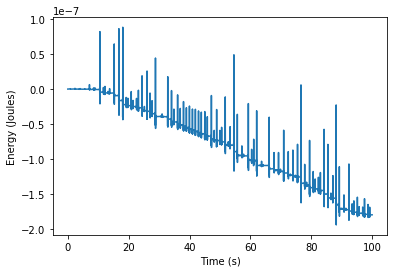

In [43]:
m = 1 # kg
g = 9.8 # m/s^2
l = 40e-2 # m
E = m*l**2*(w1**2 +(1/2)*w2**2 + w1*w2*np.cos(th1-th2)) - m*g*l*(2*np.cos(th1)+ np.cos(th2))
t = np.linspace(0, 100, len(E))
plt.plot(t, E)
plt.xlabel("Time (s)")
plt.ylabel("Energy (Joules)")
plt.show()

As you can see above, the energy only lowers by 1e-7 Joules, so it is essentially constant, as it should be.

## Here's the Animation!

In [44]:
length = len(th1)
l = 40e-2 # m
fig = plt.figure()
x1 = np.linspace(0, l, 50)
x2 = np.linspace(l, 2*l, 50)
line1, = plt.plot([], marker = "o", markerfacecolor="blue", linestyle="-", color="black")
line2, = plt.plot([], marker = "o", markerfacecolor="red", linestyle="-", color="black")
pivot, = plt.plot([], marker = "o")
plt.axis(xmin=-1, xmax=1, ymin=-1, ymax=1)

def animate(frame):
    pivot.set_data(0, 0)
    line1.set_data([0,l*np.sin(th1[50*frame])], [0,-l*np.cos(th1[50*frame])])
    line2.set_data([l*np.sin(th1[50*frame]),l*(np.sin(th1[50*frame])+np.sin(th2[50*frame]))], [-l*np.cos(th1[50*frame]), -l*(np.cos(th1[50*frame])+np.cos(th2[50*frame]))])
    
    
anim = FuncAnimation(fig, animate, frames=int(length/50), interval=50)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## (Project 9) Standing Waves on a String


In [45]:
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst

An interesting feature of the wave equation is the phenomena of **standing waves**. In the case of a wave on a string, waves of wavelength $\lambda_n=2L/n$ reflect constructively off of each end of the string, producing a fixed spatial pattern. One way to create these standing waves is to drive one end of the string at a resonant frequency
$$\omega=\frac{n\pi v}{L}\,,$$
where $n$ is a positive integer.

The time-dependent boundary conditions for the string are:
$$y(0,t)=y_0\sin(\omega t)\qquad\mbox{and}\qquad v_y(0,t)=y_0\omega\cos(\omega t)\,.$$
However, there's a rather significant problem: the amplitude of the resulting wave grows without limit when driven at a resonant frequency! This is not an issue of numerical instability. It is a feature of the wave equation.

In the following code, I simulate a string with length $L=1$ m, wave speed $v=10$ m/s, and driving amplitude $y_0=0.01$ m using the Crank-Nicolson method. I start with the string horizontal and at rest, and drive one end of the string at $\omega=3\pi v/L$ for 10 seconds. I use a spacing $a=10^{-3}$ for 1001 grid points for $x$, and a spacing $h=10^{-3}$ for 10,001 grid points for $t$. 

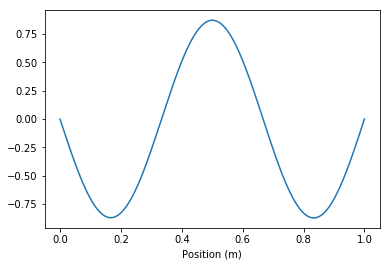

In [46]:
L, v, N = 1.0, 10.0, 1000
w = 3*np.pi*v/L
a = 1.0e-3
y0 = 0.01
h = 1.0e-3
time = np.linspace(0, 10, 10001)
x = np.linspace(0, L, 1001)
y = np.zeros(N+1)
vy = np.zeros(N+1)
# --------
c = 0.25*h**2*v**2/a**2
A2 = -c
A1 = 1 + 2*c
# --------
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    yold = y.copy()
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    j = c*y[:-2] + (1-2*c)*y[1:-1] + c*y[2:] + h*vy[1:-1]
    y[1:-1] = solve_banded((1,1), A, j)
    vy[1:-1] = vy[1:-1] + 2*c/h*(y[:-2] + y[2:] -2*y[1:-1] + yold[:-2] + yold[2:] -2*yold[1:-1])

    
shape = np.array(shape)
plt.plot(x, shape[-1]) 
plt.xlabel("Position (m)")
plt.show()

wave_part1 = shape[-1]

I plot the amplitude of the wave over time to show the divergence. 

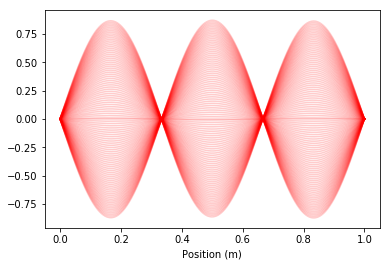

In [47]:
d = 100
d_prime = 0
while d_prime < 10001:
    plt.plot(x, shape[d_prime],alpha=0.2, color="red")
    d_prime = d_prime + d

plt.xlabel("Position (m)")
plt.show()

A more realistic treatment of this system is to add a damping term to the wave equation:
$$\frac{\partial^2y}{\partial t^2}=v^2\frac{\partial^2 y}{\partial x^2} - b\frac{\partial y}{\partial t}\,,$$
where $b$ is the damping coefficient. I rederive the differential equations simulating the wave equation with damping coefficient $b=1$ m$^2$s$^{-2}$. I save the final shape at $t=10$ s in an array named `wave_part2`.

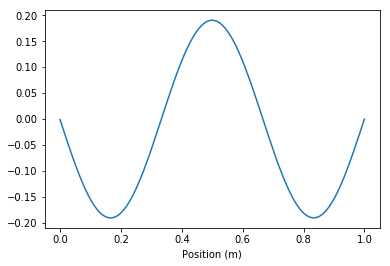

In [48]:
L, v, N = 1.0, 10.0, 1000
w = 3*np.pi*v/L
a = 1.0e-3
y0 = 0.01
h = 1.0e-3
b = 1.0 # damping constant
time = np.linspace(0, 10, 10001)
x = np.linspace(0, L, 1001)
y = np.zeros(N+1)
vy = np.zeros(N+1)
# --------
f = 1 +(h*b)/2
c = 0.25*h**2*v**2/((a**2)*f)
A2 = -c
A1 = 1 + 2*c
# --------
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2
d = ((1-(h*b)/2)/(1+(h*b)/2))
e = (h/(1+(h*b)/2))


shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    yold = y.copy()
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    j = c*y[:-2] + (1-2*c)*y[1:-1] + c*y[2:] + e*vy[1:-1]
    y[1:-1] = solve_banded((1,1), A, j)
    vy[1:-1] = d*vy[1:-1] + 2*c/h*(y[:-2] + y[2:] -2*y[1:-1] + yold[:-2] + yold[2:] -2*yold[1:-1])

    
shape = np.array(shape)
plt.plot(x, shape[-1]) 
plt.xlabel("Position (m)")
plt.show()

wave_part2 = shape[-1]

As you can see in the plot above, the magnitude of the amplitude is reduced from the previous plot.

Next, I plot the shape of this damped string every tenth of a second for ten seconds. As you can see, the solution stabilizes at finite amplitude.

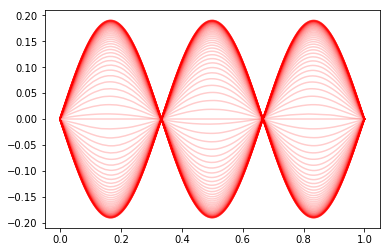

In [49]:
d = 100
d_prime = 0
while d_prime < 10001:
    plt.plot(x, shape[d_prime],alpha=0.2, color="red")
    d_prime = d_prime + d
    
plt.show()

Now I consider the case where the driving frequency is itself time-dependent. I set $\omega=2\pi t$ and then animate the string for the first 10 seconds.

In [50]:
L, v, N = 1.0, 10.0, 1000
a = 1.0e-3
y0 = 0.01
h = 1.0e-3
b = 1.0 # damping constant
time = np.linspace(0, 10, 10001)
x = np.linspace(0, L, 1001)
y = np.zeros(N+1)
vy = np.zeros(N+1)
# --------
f = 1 +(h*b)/2
c = 0.25*h**2*v**2/((a**2)*f)
A2 = -c
A1 = 1 + 2*c
# --------
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2
d = ((1-(h*b)/2)/(1+(h*b)/2))
e = (h/(1+(h*b)/2))

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    yold = y.copy()
    w = 2*np.pi*t
    y[0] = y0*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    j = c*y[:-2] + (1-2*c)*y[1:-1] + c*y[2:] + e*vy[1:-1]
    y[1:-1] = solve_banded((1,1), A, j)
    vy[1:-1] = d*vy[1:-1] + 2*c/h*(y[:-2] + y[2:] -2*y[1:-1] + yold[:-2] + yold[2:] -2*yold[1:-1])

    
shape = np.array(shape)
wave_part2 = shape[-1]
print(len(wave_part2))

1001


In [51]:
fig = plt.figure()
line, = plt.plot([])
plt.axis(xmin=0, xmax=L, ymin=-0.1, ymax=0.1)
def animate(frame):
    y = shape[5*frame]
    line.set_data(x, y)
    
anim = FuncAnimation(fig, animate, frames=1000, interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## (Project 10) Ising Model

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment - it becomes magnetized.  The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice:

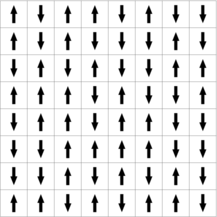

The spins themselves, in this simple model, are restricted to point in only two directions, up and down. Mathematically the spins are represented by variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can typically point in any spatial direction, not just up or down, but the Ising model, with its restriction to just the two directions, captures a lot of the important physics while being significantly simpler to understand.

Another important feature of many magnetic materials is that the individual dipoles in the material may interact magnetically in such a way that it is energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_is_j$, where $J$ is a positive interaction constant, which we will set equal to 1 for simplicity. The minus sign ensures that the interactions are *ferromagnetic*, meaning the energy is lower when dipoles are lined up.  A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$E = -\sum_{<ij>} s_i s_j\,,$$
where the notation $<ij>$ indicates a sum over **unique** pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts. You'll notice that spins at the edges of the lattice have less than four neighbors. A convenient way to handle this issue is to the make the lattice be **periodic**. That is, treat the leftmost spins as adjacent to the rightmost spins, and the topmost adjacent to the bottommost. This approach is a way to approximate the effect of spins that are outside of the lattice.

In the following code, I write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of $20\times20$ spins. To do this, I set up variables to hold the value $\pm1$ of the spin on
each lattice site, using a two-dimensional integer array, and then take the following steps:

Firs, I write a function named `energy(spins)` that takes a 2-D array of spins and calculates the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, my program goes through every pair of adjacent spins and adds up the contributions $s_ is_j$ from all of them (then multiplies by $-1$).


In [52]:
spins1 = np.zeros((20,20))
for row in range(20):
    for column in range(20):
        if column % 3 == 0:
            spins1[row, column] = 1
        else:
            spins1[row, column] = -1
spins2 = np.zeros((20, 20))
for row in range(20):
    for column in range(20):
        spins2[row, column] = 1

spins3 = np.ones((10, 10))
def energy(spins):
    energy = 0
    up, down, left, right = 0, 0, 0, 0
    for row in range(len(spins[0,:])):
        for column in range(len(spins[:,0])):
            up, down, left, right = 0, 0, 0, 0
            curr = spins[row, column]
            # up
            if row-1 < 0: # if out of grid
                up = spins[-1, column]
            else:
                up = spins[row-1, column] 
            # down
            if row+1 >= len(spins[0,:]): # if out of grid
                down = spins[0, column]
            else:
                down = spins[row+1, column]
            # left
            if column-1 < 0:
                left = spins[row, -1]
            else:
                left = spins[row, column-1]
            #right
            if column+1 >= len(spins[:,0]):
                right = spins[row, 0]
            else:
                right = spins[row, column+1]
            
            energy += curr*up + curr*down + curr*left + curr*right
    energy = -1*energy/2
    return energy


Now I use my function as the basis for a Metropolis-style simulation of the Ising model with temperature $T=1$ in units where the Boltzmann constant $k_B$ is also $1$. Initially, I set the spin variables randomly to $\pm1$, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero.  Then, my program chooses a spin at random, flips it, and calculates the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then, it decides whether to accept the flip using the Metropolis acceptance formula,
$$P_{i\to j} = \Bigg\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $E_j \le E_i$,} \\
           \exp\big[-(E_j-E_i)/k_BT\big] &\qquad\mbox{if $E_j > E_i$.}
         \end{array}$$
If the move is rejected, my program will flip the spin back to where it was. Otherwise it keeps the flipped spin. It then repeats this process for many moves.


I use `imshow` to produce an image of the final state of system after 100,000 Monte Carlo steps, using squares of two colors to represent the up and down spins. Next to it (using `subplot`) I make a plot of the relative magnetization
$$M=\frac{1}{N^2}\sum_{i=1}^{N} s_i$$
at each Monte Carlo step. You will see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization.

In [53]:
spins4 = np.zeros((20,20))
for row in range(20):
    for column in range(20):
        mean = 0
        stddev = 1
        r = random.gauss(mean, stddev)
        if r < 0:
            spins4[row, column] = -1
        else:
            spins4[row, column] = 1

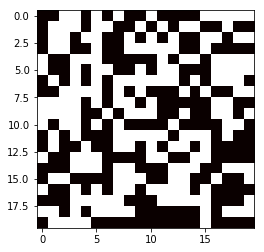

-2.0


In [54]:
plt.imshow(spins4, cmap="hot")
plt.show()
thesum = 0
for row in range(20):
    for column in range(20):
        thesum += spins4[row, column]
M = thesum
print(M)
M = 0
thesum=0

In [55]:
steps, kT = 10**4, 1
spins = spins4.copy()
M_values = []
for _ in range(steps):
    Eold = energy(spins)
    ranx = random.randint(0, 19) # since upper is inclusive
    rany = random.randint(0, 19)
    element = spins[ranx, rany]
    if element == 1:
        spins[ranx, rany] = -1
    else:
        spins[ranx, rany] = 1
    Enew = energy(spins)
    dE = Enew - Eold
    if Enew > Eold:
        if random.random() > np.exp(-dE/kT):
            spins[ranx, rany] = element # flip spin back

    thesum = 0
    for row in range(20):
        for column in range(20):
            thesum += spins[row, column]
    M = thesum/400
    M_values.append(M)

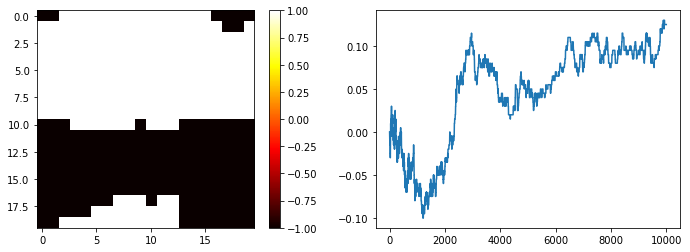

In [56]:
timesteps = np.arange(0, steps, 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(spins, cmap="hot")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.plot(timesteps, np.array(M_values))
plt.show()

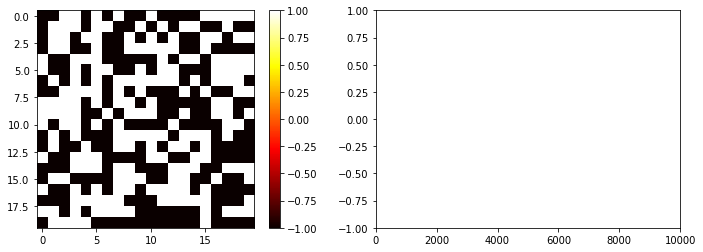

In [57]:
steps, kT = 10**4, 1
t = 0
spins = spins4.copy()
M_values = []

fig = plt.figure(figsize=(12, 4))
sub1 = plt.subplot(1, 2, 1)
line1 = plt.imshow(spins, cmap="hot")
plt.colorbar()
sub2 = plt.subplot(1, 2, 2)
line2, = plt.plot([], "b-")
plt.axis(xmin=0, xmax=steps, ymin=-1.0, ymax=1.0)
plt.show()

In [58]:
###### Animation, wiht T=1
def mc_step(t):
    Eold = energy(spins)
    ranx = random.randint(0, 19) # since upper is inclusive
    rany = random.randint(0, 19)
    element = spins[ranx, rany]
    if element == 1:
        spins[ranx, rany] = -1
    else:
        spins[ranx, rany] = 1
    Enew = energy(spins)
    dE = Enew - Eold
    if Enew > Eold:
        if random.random() > np.exp(-dE/kT):
            spins[ranx, rany] = element # flip spin back

    thesum = 0
    for row in range(20):
        for column in range(20):
            thesum += spins[row, column]
    M = thesum/400
    M_values.append(M)

In [59]:
def animate(frame):
    global t
    for i in range(steps // 1000): # 1000 steps per animation frame
        mc_step(t)
        t += 1
    M = np.array(M_values)
    line1.set_data(spins)
    line2.set_data(np.arange(len(M)), M)

In [60]:
progress = display.ProgressBar(1000)
progress.display()
anim = FuncAnimation(fig, animate, frames=1000, interval=20)
video = anim.to_html5_video()
plt.close()
display.clear_output(True)
display.HTML(video)

In [61]:
# Animation, with T=2
steps, kT = 10**4, 2
t = 0
spins = spins4.copy()
M_values = []
def mc_step(t):
    Eold = energy(spins)
    ranx = random.randint(0, 19) # since upper is inclusive
    rany = random.randint(0, 19)
    element = spins[ranx, rany]
    if element == 1:
        spins[ranx, rany] = -1
    else:
        spins[ranx, rany] = 1
    Enew = energy(spins)
    dE = Enew - Eold
    if Enew > Eold:
        if random.random() > np.exp(-dE/kT):
            spins[ranx, rany] = element # flip spin back

    thesum = 0
    for row in range(20):
        for column in range(20):
            thesum += spins[row, column]
    M = thesum/400
    M_values.append(M)
    
def animate(frame):
    global t
    for i in range(steps // 1000): # 1000 steps per animation frame
        mc_step(t)
        t += 1
    M = np.array(M_values)
    line1.set_data(spins)
    line2.set_data(np.arange(len(M)), M)

anim = FuncAnimation(fig, animate, frames=1000, interval=20)
video = anim.to_html5_video()
plt.close()
display.clear_output(True)
display.HTML(video)

In [62]:
#Animaion with T=3
steps, kT = 10**4, 3
t = 0
spins = spins4.copy()
M_values = []
def mc_step(t):
    Eold = energy(spins)
    ranx = random.randint(0, 19) # since upper is inclusive
    rany = random.randint(0, 19)
    element = spins[ranx, rany]
    if element == 1:
        spins[ranx, rany] = -1
    else:
        spins[ranx, rany] = 1
    Enew = energy(spins)
    dE = Enew - Eold
    if Enew > Eold:
        if random.random() > np.exp(-dE/kT):
            spins[ranx, rany] = element # flip spin back

    thesum = 0
    for row in range(20):
        for column in range(20):
            thesum += spins[row, column]
    M = thesum/400
    M_values.append(M)
    
def animate(frame):
    global t
    for i in range(steps // 1000): # 1000 steps per animation frame
        mc_step(t)
        t += 1
    M = np.array(M_values)
    line1.set_data(spins)
    line2.set_data(np.arange(len(M)), M)

anim = FuncAnimation(fig, animate, frames=1000, interval=20)
video = anim.to_html5_video()
plt.close()
display.clear_output(True)
display.HTML(video)